<a href="https://colab.research.google.com/github/mventparram/HotspotHero6/blob/main/Internet_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#necessary for creating maps, check if installed if not, install in appropriate way either through conda, or pip like here
!pip install --user geopandas

     |████████████████████████████████| 972kB 4.7MB/s 
     |████████████████████████████████| 6.5MB 19.5MB/s 
     |████████████████████████████████| 14.8MB 307kB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#__credits__ = ["Daniel Hardesty Lewis"], learned to install this package from Daniel Hardesty Lewis's code
!pip install --user contextily

     |████████████████████████████████| 18.3MB 1.2MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#now we can import geopandas and necessary packages for mapping 
import sys 


In [ ]:
import geopandas as gpd

In [ ]:
#helps us load our large zipfile, helps us create a path
import os

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

In [ ]:
#written in colab.research.google.com so we upload the zipfile to the colab (doesn't work locally like jupyter notebook)
os.getcwd()

'/content'

In [ ]:
#creating variable unservedmap and assigninging our dataset as a geopandas dataframe
unservedmap = gpd.read_file('https://broadband.georgia.gov/sites/default/files/documents/GBDI_Unserved_CB_Jun2020_SHP.zip')

In [ ]:
#printing our dataset
unservedmap

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
0,130019501001082,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,14,Unserved,100,0.055681,1.667051e-04,"POLYGON ((-82.13259 31.83737, -82.13357 31.837..."
1,130019501002050,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,18,Unserved,100,0.122149,5.090901e-04,"POLYGON ((-82.37279 31.89540, -82.37271 31.895..."
2,130019501002088,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,15,23,Unserved,61,0.082005,3.024479e-04,"POLYGON ((-82.33178 31.86850, -82.33131 31.868..."
3,130019501001079,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,3,Unserved,100,0.032988,5.844054e-05,"POLYGON ((-82.20722 31.84821, -82.20723 31.849..."
4,130019501001058,2010,001,Appling,1,Heart of Georgia Altamaha,012,156,019,0,17,Unserved,100,0.069873,2.919253e-04,"POLYGON ((-82.15611 31.87255, -82.15619 31.872..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291081,133219501001054,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.176064,2.638515e-05,"POLYGON ((-83.99450 31.78669, -83.99440 31.786..."
291082,133219501001028,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.002509,3.448480e-07,"POLYGON ((-83.92407 31.83703, -83.92411 31.836..."
291083,133219501002177,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.051664,1.533145e-04,"POLYGON ((-83.80800 31.68675, -83.80800 31.686..."
291084,133219506001053,2010,321,Worth,1,Southwest Georgia,008,152,013,0,0,No Locations,None,0.008132,1.686459e-06,"POLYGON ((-83.97687 31.33473, -83.97686 31.334..."


In [ ]:
#data carpentry, we are interested in focusing by county and seeing how many unique values each county has in each column
unservedmap.groupby('County').nunique().sort_values('CBID')

,CBID,CBYear,CountyFIPS,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
County,,,,,,,,,,,,,,,
Quitman,243,1,1,1,1,1,1,1,21,33,3,10,243,243,243
Schley,345,1,1,1,1,1,1,1,30,24,3,44,345,345,345
Glascock,373,1,1,1,1,1,1,2,1,30,2,1,373,373,373
Webster,450,1,1,1,1,1,1,1,18,23,3,24,450,450,450
Taliaferro,462,1,1,1,1,1,3,2,19,18,3,37,462,462,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chatham,7339,1,1,1,1,1,6,2,273,29,3,32,7339,7339,7339
Gwinnett,7502,1,1,1,1,4,20,9,481,23,3,40,7502,7502,7502
DeKalb,7591,1,1,1,1,3,16,8,441,76,3,70,7591,7591,7591


In [ ]:
#creating interactive variable, takes in str of county name and assigns it as a variable
county = input('Enter a county name')

Enter a county nameCobb


In [ ]:
#using our variable that takes in str input, this code assigns and prints out a narrowed dataset for only the county that was entered
map = unservedmap.loc[unservedmap['County'] == county]
map

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
61002,130670306022020,2010,067,Cobb,0,Atlanta Regional Commission,011,037,033,0,1,Unserved,100,0.009326,3.943111e-06,"POLYGON ((-84.54942 33.97716, -84.54862 33.976..."
61003,130670306022048,2010,067,Cobb,0,Atlanta Regional Commission,011,037,033,71,0,Served,<1,0.010535,5.845425e-06,"POLYGON ((-84.54786 33.97016, -84.54856 33.970..."
61004,130670310012068,2010,067,Cobb,0,Atlanta Regional Commission,011,042,006,234,0,Served,<1,0.024036,1.974405e-05,"POLYGON ((-84.53059 33.90730, -84.52886 33.907..."
61005,130670310044005,2010,067,Cobb,0,Atlanta Regional Commission,011,041,033,104,0,Served,<1,0.025207,2.817463e-05,"POLYGON ((-84.56317 33.88580, -84.56292 33.885..."
61006,130670310043004,2010,067,Cobb,0,Atlanta Regional Commission,011,041,033,278,0,Served,<1,0.059163,6.680640e-05,"POLYGON ((-84.56365 33.88769, -84.56365 33.887..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71358,130670303392020,2010,067,Cobb,0,Atlanta Regional Commission,011,043,006,0,0,No Locations,None,0.003698,2.772860e-07,"POLYGON ((-84.45659 33.88981, -84.45665 33.889..."
71359,130670303422013,2010,067,Cobb,0,Atlanta Regional Commission,006,046,032,0,0,No Locations,None,0.018747,5.265521e-06,"POLYGON ((-84.42738 34.04543, -84.42800 34.045..."
71360,130670311062014,2010,067,Cobb,0,Atlanta Regional Commission,013,038,038,0,0,No Locations,None,0.015086,2.084765e-06,"POLYGON ((-84.57848 33.84884, -84.57930 33.848..."
71361,130670311182029,2010,067,Cobb,0,Atlanta Regional Commission,011,040,006,0,0,No Locations,None,0.003644,5.428000e-07,"POLYGON ((-84.51223 33.84720, -84.51221 33.846..."


In [ ]:
"""
__author__ = "Daniel Hardesty Lewis"
__copyright__ = "Copyright 2020, Daniel Hardesty Lewis"
__credits__ = ["Daniel Hardesty Lewis"]
__license__ = "GPLv3"
__version__ = "1.0.0"
__maintainer__ = "Daniel Hardesty Lewis"
__email__ = "dhl@tacc.utexas.edu"
"""
def visualize(gdfs,edgecolors=False,facecolors=False,units=7.):

    f, ax = plt.subplots(figsize=(
        units,
        gdfs[0].shape[1]/gdfs[0].shape[0]*units
    ))
    if edgecolors==False:
        edgecolors = ['k']*len(gdfs)
    if facecolors==False:
        facecolors = ['r']*len(gdfs)
    for i, gdf in enumerate(gdfs):
        gdf.to_crs(epsg=3857).plot(
            ax=ax,
            figsize=(
                units,
                gdfs[0].shape[1]/gdfs[0].shape[0]*units
            ),
            alpha=.5,
            edgecolor=edgecolors[i],
            facecolor=facecolors[i]
        )
    ctx.add_basemap(ax)
    plt.show()

In [ ]:
#setting up variable for 'unreserved' labeled areas within Rockdale data
unserved = map.loc[map['Status'] == 'Unserved']

In [ ]:
unserved

,CBID,CBYear,CountyFIPS,County,GeorgiaOne,RC,USCongress,GAHouse,GASenate,Served,Unserved,Status,UnservPCT,SHAPE_Leng,SHAPE_Area,geometry
101147,130970806021002,2010,097,Douglas,0,Atlanta Regional Commission,013,062,035,58,46,Unserved,44,0.181597,6.390067e-04,"POLYGON ((-84.65706 33.72697, -84.65698 33.727..."
101175,130970804023041,2010,097,Douglas,0,Atlanta Regional Commission,013,068,030,16,5,Unserved,24,0.038631,7.016773e-05,"POLYGON ((-84.85813 33.58414, -84.85905 33.584..."
101176,130970804023051,2010,097,Douglas,0,Atlanta Regional Commission,013,068,030,3,2,Unserved,40,0.019803,1.641297e-05,"POLYGON ((-84.84614 33.57366, -84.85172 33.573..."
101276,130970801022073,2010,097,Douglas,0,Atlanta Regional Commission,013,061,035,0,4,Unserved,100,0.006369,2.224940e-06,"POLYGON ((-84.60934 33.73861, -84.60947 33.738..."
101278,130970801022101,2010,097,Douglas,0,Atlanta Regional Commission,013,061,035,0,3,Unserved,100,0.021335,2.657813e-05,"POLYGON ((-84.59741 33.74113, -84.59737 33.741..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102698,130970804043001,2010,097,Douglas,0,Atlanta Regional Commission,013,067,030,0,5,Unserved,100,0.031457,4.459172e-05,"POLYGON ((-84.85963 33.77295, -84.86011 33.772..."
102699,130970804031012,2010,097,Douglas,0,Atlanta Regional Commission,013,067,030,0,2,Unserved,100,0.003965,9.271240e-07,"POLYGON ((-84.88616 33.72813, -84.88604 33.729..."
102717,130970801022069,2010,097,Douglas,0,Atlanta Regional Commission,013,061,035,45,16,Unserved,26,0.120738,4.034504e-04,"POLYGON ((-84.60008 33.73504, -84.60055 33.734..."
102718,130970801022093,2010,097,Douglas,0,Atlanta Regional Commission,013,061,035,0,1,Unserved,100,0.016252,1.100250e-05,"POLYGON ((-84.58782 33.74226, -84.58786 33.742..."


In [ ]:
#creating variable gdfs with our user entered county map and the unserved areas
gdfs = [map,unserved]

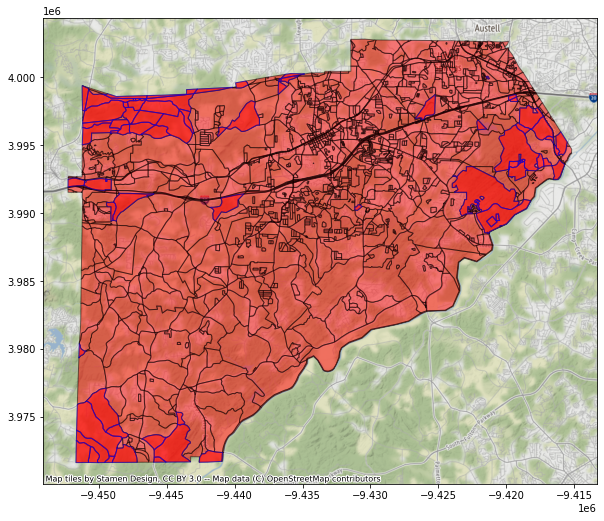

In [ ]:
#printing out the map with the unserved areas outlined in red
visualize(gdfs,edgecolors=['k','b'],units=910.)